## Cross selling is the ability to sell more products to a customer by analysing the customers shopping trend as well as the general shopping trends and patterns which are in common with the customer's shopping patterns. In this project association rule mining is used for market basket analysis for grocery dataset and retail transcation dataset using FP growth algorithm. 

## Load Necessary Dependencies

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Load the Groceries Dataset

In [6]:
grocery_df = pd.read_csv('grocery_dataset_df.csv', sep =',')

In [7]:
grocery_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN
1,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,NaN
2,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,NaN
3,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,NaN
4,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,0,NaN,1,0,NaN
9831,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN
9832,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,NaN
9833,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN


## View top sold items

In [8]:
total_item_count = sum(grocery_df.sum())
print(total_item_count)
item_summary_df = grocery_df.sum().sort_values(ascending = False).reset_index().head(n=20)
item_summary_df.rename(columns={item_summary_df.columns[0]:'item_name',item_summary_df.columns[1]:'item_count'}, inplace=True)
item_summary_df.head()

43367.0


,item_name,item_count
0,whole milk,2513.0
1,other vegetables,1903.0
2,rolls/buns,1809.0
3,soda,1715.0
4,yogurt,1372.0


## Visualize top sold items

Text(0.5, 1.0, 'Item sales distribution')

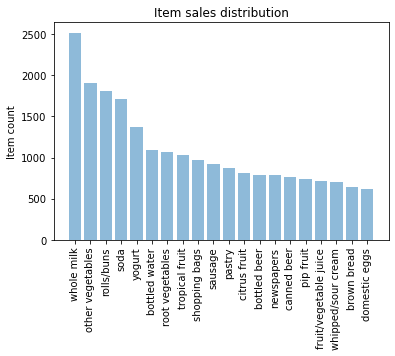

In [9]:
objects = (list(item_summary_df['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary_df['item_count'].head(n=20))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

## Analyze items contributing to top sales

In [10]:
item_summary_df['item_perc'] = item_summary_df['item_count']/total_item_count
item_summary_df['total_perc'] = item_summary_df.item_perc.cumsum()
item_summary_df.head(10)

,item_name,item_count,item_perc,total_perc
0,whole milk,2513.0,0.057947,0.057947
1,other vegetables,1903.0,0.043881,0.101829
2,rolls/buns,1809.0,0.041714,0.143542
3,soda,1715.0,0.039546,0.183089
4,yogurt,1372.0,0.031637,0.214725
5,bottled water,1087.0,0.025065,0.239791
6,root vegetables,1072.0,0.024719,0.264510
7,tropical fruit,1032.0,0.023797,0.288307
8,shopping bags,969.0,0.022344,0.310651
9,sausage,924.0,0.021307,0.331957


## Analyze items contributing to top 50% of sales

In [11]:
item_summary_df[item_summary_df.total_perc <= 0.5].shape

(19, 4)

In [12]:
item_summary_df[item_summary_df.total_perc <= 0.5]

,item_name,item_count,item_perc,total_perc
0,whole milk,2513.0,0.057947,0.057947
1,other vegetables,1903.0,0.043881,0.101829
2,rolls/buns,1809.0,0.041714,0.143542
3,soda,1715.0,0.039546,0.183089
4,yogurt,1372.0,0.031637,0.214725
5,bottled water,1087.0,0.025065,0.239791
6,root vegetables,1072.0,0.024719,0.264510
7,tropical fruit,1032.0,0.023797,0.288307
8,shopping bags,969.0,0.022344,0.310651
9,sausage,924.0,0.021307,0.331957


## Construct Orange Table

In [25]:
input_assoc_rules = grocery_df
domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_assoc_rules,Y= None)

## Prune Dataset for frequently purchased items

In [26]:
def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5, start_item = None, end_item = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'}, inplace=True)
    if not start_item and not end_item: 
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]

In [27]:
output_df, item_counts = prune_dataset(input_df=grocery_df, length_trans=2,total_sales_perc=0.4)
print(output_df.shape)
print(list(output_df.columns))

(4585, 13)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer']


## Load Necessary Dependencies

In [28]:
import Orange
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *

## Association Rule Mining with FP Growth

In [30]:
input_assoc_rules = output_df
domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_assoc_rules,Y= None)
data_gro_1_en, mapping = OneHot.encode(data_gro_1, include_class=False)

In [31]:
min_support = 0.01
print("num of required transactions = ", int(input_assoc_rules.shape[0]*min_support))
num_trans = input_assoc_rules.shape[0]*min_support
itemsets = dict(frequent_itemsets(data_gro_1_en, min_support=min_support))

num of required transactions =  45


In [32]:
len(itemsets)

10994

In [33]:
confidence = 0.3
rules_df = pd.DataFrame()

if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_gro_1, mapping)}
    
    eligible_ante = [v for k,v in names.items() if v.endswith("1")]
    
    N = input_assoc_rules.shape[0]
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for ex_rule_frm_rule_stat in rule_stats:
        ante = ex_rule_frm_rule_stat[0]            
        cons = ex_rule_frm_rule_stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_ante:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : ex_rule_frm_rule_stat[2],
                             'confidence' : ex_rule_frm_rule_stat[3],
                             'coverage' : ex_rule_frm_rule_stat[4],
                             'strength' : ex_rule_frm_rule_stat[5],
                             'lift' : ex_rule_frm_rule_stat[6],
                             'leverage' : ex_rule_frm_rule_stat[7],
                             'antecedent': ante_rule,
                             'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

Raw rules data frame of 2086 rules generated


## Sorting rules in our Grocery Dataset

In [34]:
(pruned_rules_df[['antecedent','consequent',
                  'support','confidence','lift']].groupby('consequent')
                                                 .max()
                                                 .reset_index()
                                                 .sort_values(['lift', 'support','confidence'],
                                                              ascending=False))

,consequent,antecedent,support,confidence,lift
4,root vegetables,"yogurt, other vegetables, tropical fruit",228,0.450450,2.167172
7,tropical fruit,"yogurt, root vegetables",89,0.414414,2.078873
5,sausage,"shopping bags, rolls/buns",59,0.364964,2.043172
1,citrus fruit,"whole milk, other vegetables, tropical fruit",46,0.304636,1.942636
9,yogurt,"whole milk, tropical fruit",149,0.474576,1.853435
2,other vegetables,"yogurt, whole milk, citrus fruit",228,0.633333,1.796927
3,rolls/buns,"yogurt, tropical fruit",97,0.495238,1.592333
8,whole milk,"yogurt, tropical fruit",228,0.700000,1.581034
0,bottled water,"bottled beer, whole milk",52,0.305882,1.567006
6,soda,"yogurt, sausage",95,0.380282,1.361118


## Association rule mining on our Online Retail datase

## Load and Filter Dataset

In [39]:
cs_mba = pd.read_csv("C:\\Users\\selorm hodo\\Downloads\\Online _Retail_sql.csv", encoding ='latin1')
cs_mba['InvoiceDate'] =  pd.to_datetime(cs_mba['InvoiceDate'])
cs_mba_uk = cs_mba[cs_mba.Country == 'United Kingdom']

In [40]:
cs_mba_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [41]:
cs_mba_uk = cs_mba_uk[~(cs_mba_uk.InvoiceNo.str.contains("C") == True)]
cs_mba_uk = cs_mba_uk[~cs_mba_uk.Quantity<0]

In [42]:
cs_mba_uk.shape

(486286, 8)

In [43]:
cs_mba_uk.InvoiceNo.value_counts().shape

(18786,)

## Build Transaction Dataset

In [44]:
items = list(cs_mba_uk.Description.unique())
grouped = cs_mba_uk.groupby('InvoiceNo')
transaction_level_df_uk = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]

In [45]:
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level_df_uk.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
tranasction_df = pd.DataFrame(new)
del(tranasction_df[tranasction_df.columns[0]])

In [46]:
tranasction_df.shape

(18786, 4058)

In [47]:
tranasction_df.head()

,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,...,SET OF 6 RIBBONS COUNTRY STYLE,SNACK TRAY RED VINTAGE DOILY,SET OF 6 RIBBONS PERFECTLY PRETTY,SET OF 6 RIBBONS PARTY,SET 10 CARDS SNOWY ROBIN 17099,SET 10 CARDS SWIRLY XMAS TREE 17104,"LETTER ""U"" BLING KEY RING",CREAM HANGING HEART T-LIGHT HOLDER,BLACK SIL'T SQU CANDLE PLATE,"PAPER CRAFT , LITTLE BIRDIE"
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
output_df_uk_n, item_counts_n = prune_dataset(input_df=tranasction_df, length_trans=2, start_item=0, end_item=15)
print(output_df_uk_n.shape)

(4644, 15)


In [49]:
output_df_uk_n.head()

,JUMBO BAG RED RETROSPOT,REGENCY CAKESTAND 3 TIER,PARTY BUNTING,LUNCH BAG RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,SET OF 3 CAKE TINS PANTRY DESIGN,NATURAL SLATE HEART CHALKBOARD,LUNCH BAG BLACK SKULL.,HEART OF WICKER SMALL,JUMBO BAG PINK POLKADOT,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO STORAGE BAG SUKI,PACK OF 72 RETROSPOT CAKE CASES,PAPER CHAIN KIT 50'S CHRISTMAS,WOODEN PICTURE FRAME WHITE FINISH
12,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
14,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
16,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
25,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
33,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0


## Association Rule Mining with FP Growth

In [50]:
input_assoc_rules = output_df_uk_n
domain_transac = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_tran_uk = Orange.data.Table.from_numpy(domain=domain_transac,  X=input_assoc_rules,Y= None)
data_tran_uk_en, mapping = OneHot.encode(data_tran_uk, include_class=True)

In [51]:
support = 0.01
print("num of required transactions = ", int(input_assoc_rules.shape[0]*support))
num_trans = input_assoc_rules.shape[0]*support
itemsets = dict(frequent_itemsets(data_tran_uk_en, support))

num of required transactions =  46


In [52]:
len(itemsets)

667718

In [53]:
confidence = 0.3
rules_df = pd.DataFrame()
if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_tran_uk, mapping)}
    
    eligible_ante = [v for k,v in names.items() if v.endswith("1")]
    
    N = input_assoc_rules.shape[0]
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for ex_rule_frm_rule_stat in rule_stats:
        ante = ex_rule_frm_rule_stat[0]            
        cons = ex_rule_frm_rule_stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_ante:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : ex_rule_frm_rule_stat[2],
                             'confidence' : ex_rule_frm_rule_stat[3],
                             'coverage' : ex_rule_frm_rule_stat[4],
                             'strength' : ex_rule_frm_rule_stat[5],
                             'lift' : ex_rule_frm_rule_stat[6],
                             'leverage' : ex_rule_frm_rule_stat[7],
                             'antecedent': ante_rule,
                             'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

Raw rules data frame of 143345 rules generated


## Sort and display rules

In [54]:
dw = pd.options.display.max_colwidth
pd.options.display.max_colwidth = 100
(pruned_rules_df[['antecedent','consequent',
                  'support','confidence','lift']].groupby('consequent')
                                                 .max()
                                                 .reset_index()
                                                 .sort_values(['lift', 'support','confidence'],
                                                              ascending=False)).head(5)

,consequent,antecedent,support,confidence,lift
8,PACK OF 72 RETROSPOT CAKE CASES,"WOODEN PICTURE FRAME WHITE FINISH, NATURAL SLATE HEART CHALKBOARD",145,0.980000,5.136704
3,JUMBO SHOPPER VINTAGE RED PAISLEY,"WOODEN PICTURE FRAME WHITE FINISH, NATURAL SLATE HEART CHALKBOARD",384,0.930556,4.236765
9,PAPER CHAIN KIT 50'S CHRISTMAS,"SET OF 3 CAKE TINS PANTRY DESIGN , NATURAL SLATE HEART CHALKBOARD",94,0.597701,4.199280
4,JUMBO STORAGE BAG SUKI,"WOODEN PICTURE FRAME WHITE FINISH, NATURAL SLATE HEART CHALKBOARD",405,0.903846,4.012870
10,PARTY BUNTING,"WOODEN PICTURE FRAME WHITE FINISH, LUNCH BAG RED RETROSPOT",145,0.960784,3.920811


In [55]:
pd.options.display.max_colwidth = dw